### Background
Bike-sharing systems represent a modern solution to urban transportation challenges, offering users an automated process for renting and returning bicycles. These systems contribute to managing traffic congestion, promoting environmental sustainability, and encouraging active transportation.

### Scope
With over 500 bike-sharing programs globally and a fleet exceeding 500,000 bicycles, bike-sharing systems have become integral to urban transportation infrastructure.

### Objective
A South Korean company collects daily data on bike rentals, including metrics like rental duration, rental count, and other relevant variables. The primary objective is to analyze demand patterns and usage trends in bike-sharing services.

### Importance
As bike-sharing systems continue to expand, understanding factors influencing bike rental demand becomes crucial. Analyzing rental patterns, identifying peak usage times, and assessing external factors like weather conditions or special events are essential for optimizing bike-sharing operations and meeting user needs effectively.

## Business Problem Statement

The business problem is to ensure a stable supply of rental bikes in urban cities by predicting the demand for bikes at each hour. By providing a consistent supply of rental bikes, the system can enhance mobility comfort for the public, reduce waiting times, and improve customer satisfaction.

## Approach

To address this problem, we aim to develop a predictive model considering various influencing factors such as time of day, seasonality, weather conditions, and holidays. By accurately predicting demand, bike-sharing system operators can ensure an adequate supply of bikes at all times, thereby enhancing the user experience and increasing usage of the bike-sharing system. This, in turn, can positively impact urban transportation sustainability by reducing congestion, air pollution, and greenhouse gas emissions.


## Importing Libraries 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Know your Data

In [40]:
df = pd.read_csv(r"C:\Users\anmol\Downloads\Pedal Pulse\SeoulBikeData.csv", encoding="unicode_escape")

In [41]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [44]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [45]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Variables Description 

*   **Date**: The date of the observation.
*   **Rented Bike Count**: The number of bikes rented during the observation period.
*   **Hour**: The hour of the day when the observation was taken.
*   **Temperature(°C)**: The temperature in Celsius at the time of observation.
*   **Humidity(%)**: The percentage of humidity at the time of observation.
*   **Wind speed (m/s)**: The wind speed in meters per second at the time of observation.
*   **Visibility (10m)**: The visibility in meters at the time of observation.
*   **Dew point temperature(°C)**: The dew point temperature in Celsius at the time of observation.
*   **Solar Radiation (MJ/m2)**: The amount of solar radiation in mega-joules per square meter at the time of observation.
*   **Rainfall(mm)**: The amount of rainfall in millimeters during the observation period.
*   **Snowfall(cm)**: The amount of snowfall in centimeters during the observation period.
*   **Seasons**: The season of the year when the observation was taken.
*   **Holiday**: Whether the observation was taken on a holiday or not.
*   **Functioning Day**: Whether the bike sharing system was operating normally or not during the observation period.


### Data Wrangling

In [46]:
df["Date"]  =pd.to_datetime(df["Date"], format = '%d/%m/%Y')

df["weekday"] =df["Date"].dt.day_name()
df["day"]=df["Date"].dt.day
df["month"]=df["Date"].dt.month
df["year"]=df["Date"].dt.year

df.drop("Date",axis = 1, inplace=True)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

In [48]:
df.sample(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,day,month,year
8548,121,4,0.5,39,1.6,2000,-11.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,Thursday,22,11,2018
5882,443,2,31.5,68,0.3,1001,24.8,0.00,0.0,0.0,Summer,No Holiday,Yes,Friday,3,8,2018
8072,1906,8,4.7,72,1.0,1306,0.0,0.12,0.0,0.0,Autumn,No Holiday,Yes,Friday,2,11,2018
1552,205,16,-4.2,31,3.5,1974,-18.8,1.42,0.0,0.0,Winter,No Holiday,Yes,Saturday,3,2,2018
5992,855,16,35.4,45,2.6,1529,21.6,1.84,0.0,0.0,Summer,No Holiday,Yes,Tuesday,7,8,2018
252,247,12,-5.2,33,4.6,1973,-19.0,1.26,0.0,0.0,Winter,No Holiday,Yes,Monday,11,12,2017
5168,2215,8,26.4,64,0.5,1909,19.0,1.33,0.0,0.0,Summer,No Holiday,Yes,Wednesday,4,7,2018
8119,259,7,5.8,79,1.0,862,2.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,Sunday,4,11,2018
3555,325,3,11.6,76,1.0,364,7.5,0.00,0.0,0.0,Spring,No Holiday,Yes,Saturday,28,4,2018
1756,33,4,-8.6,31,3.5,2000,-22.7,0.00,0.0,0.0,Winter,No Holiday,Yes,Monday,12,2,2018


## Data Vizualization

### 1. Rented Bike Count by Seasons

Text(0.5, 1.0, 'Rented Bike Count by Season')

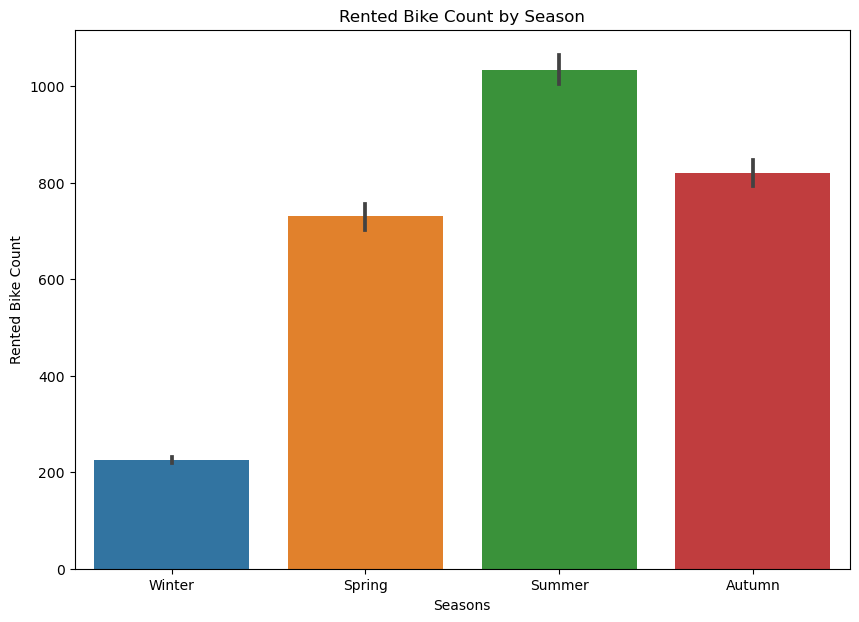

In [49]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons", y="Rented Bike Count", data=df)
plt.title("Rented Bike Count by Season")

## Insights :

*1. Seasonal Demand Variations*
- Peak demand in summer
- Lowest demand in winter

*2. Operational Strategy*
- Adjust bike availability seasonally
- Offer off-season promotions to maintain usage


### 2. Rented Bike Count by Months

Text(0.5, 1.0, 'Rented Bike Count trend by Months')

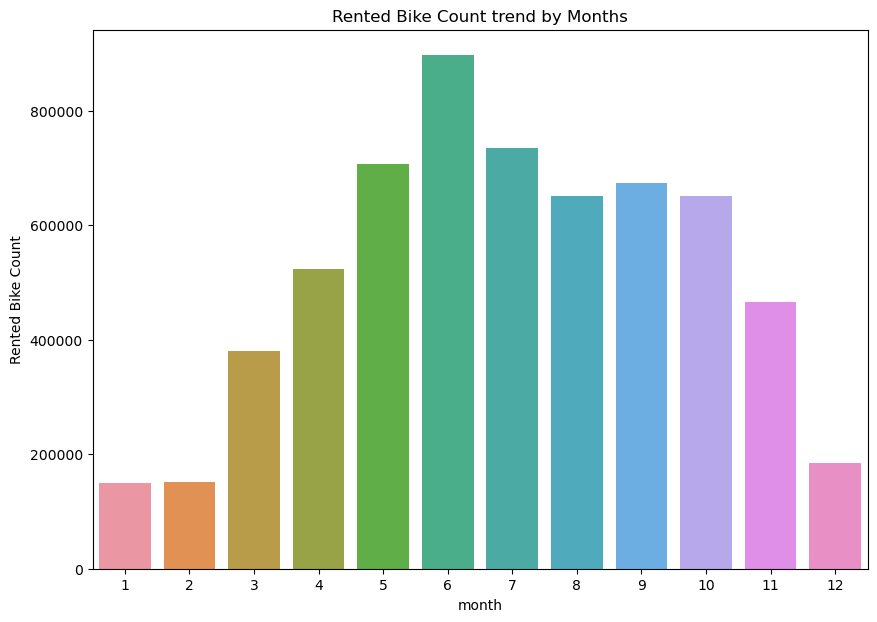

In [50]:
plt.figure(figsize=(10,7))
month =df.groupby("month").sum().reset_index()
sns.barplot(x="month", y="Rented Bike Count", data=month)
plt.title("Rented Bike Count trend by Months")

## Insights :

1. *Demand analysis and Maintenance Scheduling:*
   - *Peak Rental Periods:* Mid-year requires high bike availability.
   - *Off-Peak Maintenance:* Early and late-year months (January, February, December) are ideal for comprehensive servicing.

2. *Operational Recommendations:*
   - *Fleet Readiness:* Ensure bikes are in top condition before the peak season.
   - *Efficient Maintenance:* Conduct major maintenance during off-peak periods.
   

### 3. Rented Bike Count by Hour

Text(0.5, 1.0, 'Rented Bike Count trend by Hour')

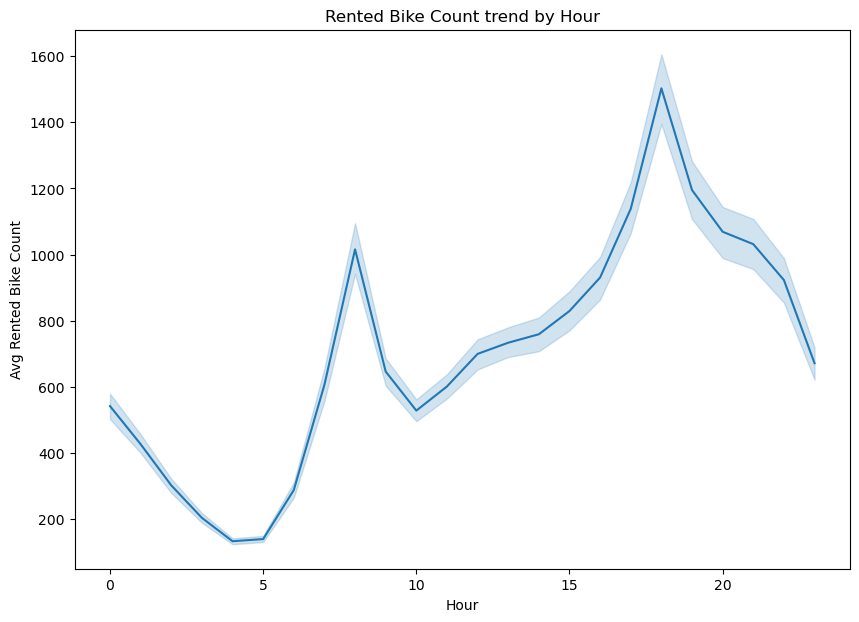

In [51]:
import warnings
warnings.filterwarnings('ignore')

# Average Rented Bike Count by Hour
plt.figure(figsize=(10,7))
sns.lineplot(x='Hour', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour")

## Insights :

- Demand for bike rentals is **lowest in the early morning**, **increases steadily throughout the day**, **peaks around 6 PM**, and then **gradually declines**.

### 4.  Rented Bike Count by Holiday

Text(0.5, 1.0, 'Rented Bike Count by Holiday')

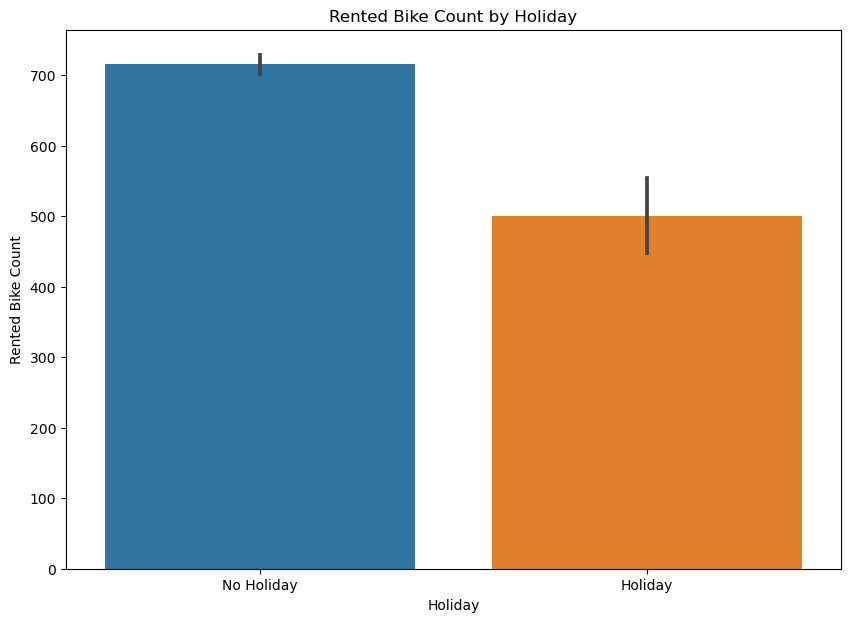

In [52]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday", y="Rented Bike Count",data = df)
plt.title("Rented Bike Count by Holiday")

## Insights :

The demand for bike rentals is primarily driven by professionals, as evidenced by the noticeably **lower demand on holidays** compared to regular weekdays.


### 5.  Rented Bike Count by Hour for each Season and Day

Text(0.5, 1.0, 'Rented Bike Count trend by Hour for each Seasons')

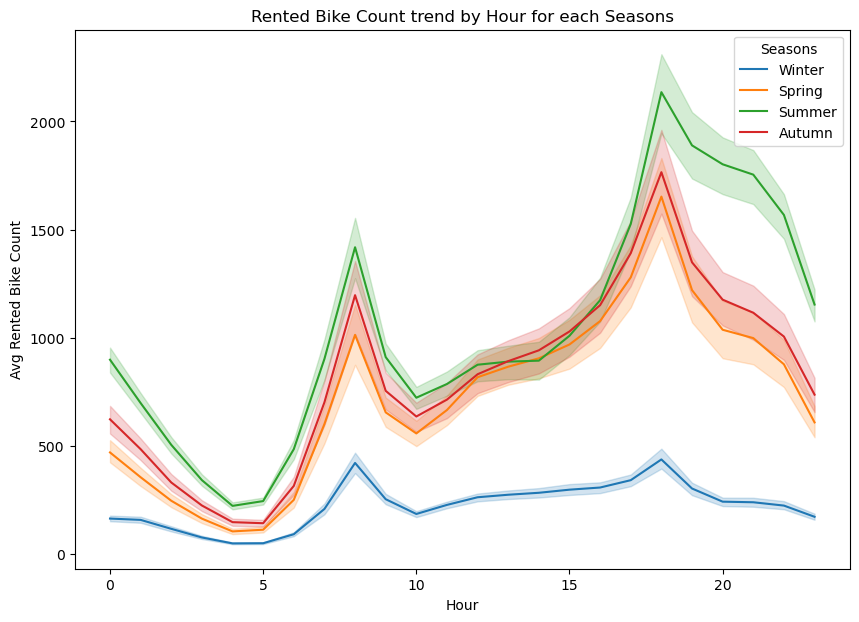

In [53]:
plt.figure(figsize=(10,7))
sns.lineplot(x="Hour", y="Rented Bike Count", hue="Seasons", data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour for each Seasons")

Text(0.5, 1.0, 'Rented Bike Count trend by Hour for each Day ')

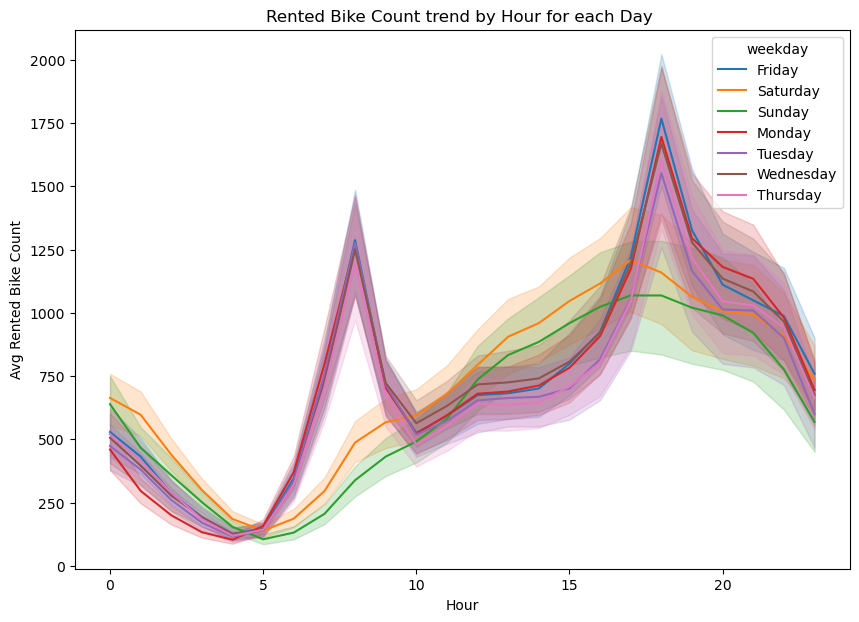

In [54]:
plt.figure(figsize=(10,7))
sns.lineplot(x="Hour", y="Rented Bike Count", hue="weekday", data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour for each Day ")

## Insights :

- In summer, increase bike availability, hire staff, and enhance promotions. In winter, operations can be scaled down, with resources reallocated to other business areas.
- Daily rental patterns remain consistent across seasons, with rush hour and non-rush hour strategies remaining unchanged; demand is lowest in winter and highest in summer.

### 6.  Rented Bike Count by Temperature(°C)

Text(0.5, 1.0, 'Rented Bike Count trend by Temperature(°C)')

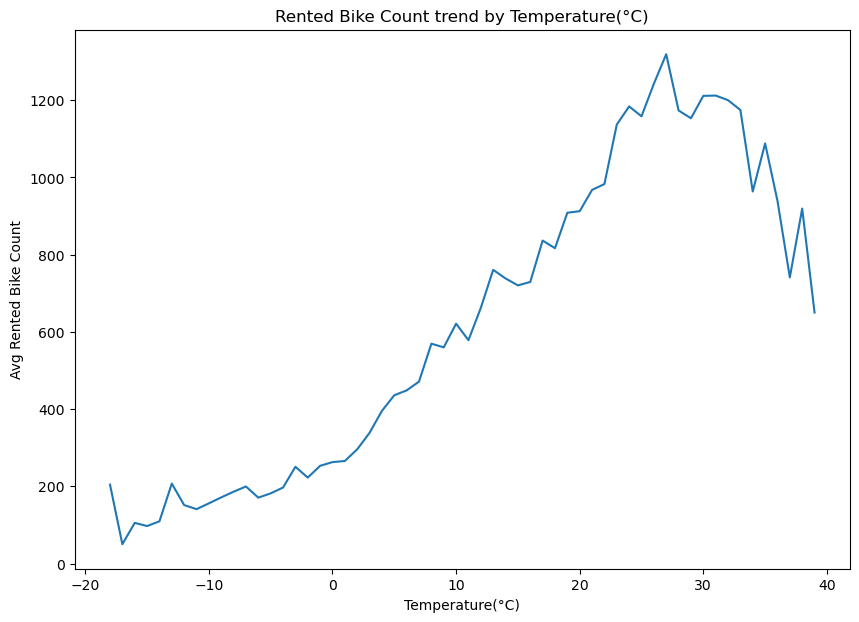

In [55]:
import warnings
warnings.filterwarnings('ignore')

df['Temperature Bin'] = df['Temperature(°C)'].round(0).astype('int64') # created temperature bin of 1°C for better visualization

# Average Rented Bike Count by Temperature(°C)
plt.figure(figsize=(10,7))
df.groupby('Temperature Bin')['Rented Bike Count'].mean().plot(kind='line')
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Temperature(°C)")
plt.title("Rented Bike Count trend by Temperature(°C)")

## Insights :

- Strategic resource allocation based on temperature trends optimizes bike availability and fosters rental uptake.
- Above 30°C, demand diminishes, prompting operational adjustments and heightened marketing endeavors.


### 7. Rented Bike Demand by Rainfall & Snowfall

Text(0.5, 1.0, 'Rented Bike Count by Snowfall (cm)')

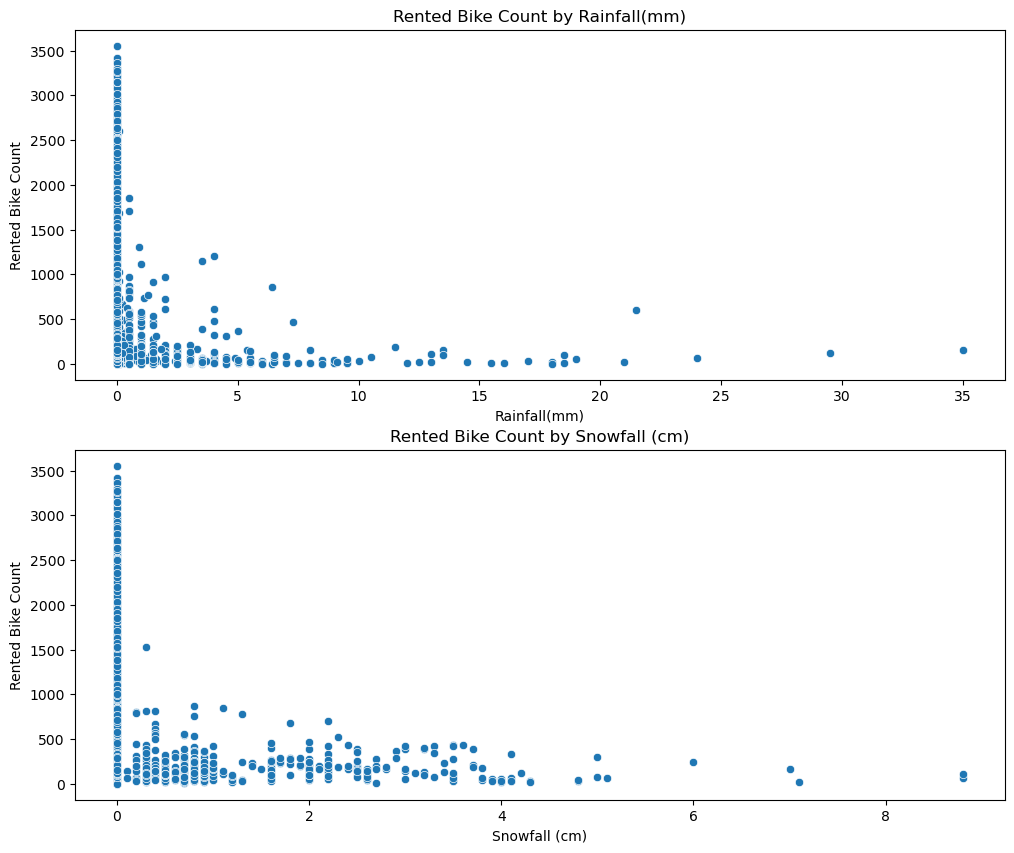

In [56]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=df)
plt.title("Rented Bike Count by Rainfall(mm)")

plt.subplot(2,1,2)
sns.scatterplot(x='Snowfall (cm)', y='Rented Bike Count', data=df)
plt.title("Rented Bike Count by Snowfall (cm)")

## Insights :

- As evident from the scatterplot, bike rental demand is maximum when there is no rain or snowfall.


In [60]:
df.drop(columns=["Temperature Bin"], inplace=True)

In [61]:
df.skew(numeric_only=True).sort_values()

year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
month                        -0.010458
Hour                          0.000000
day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Multicollinearity

   - Refers to strong correlations between independent variables in a regression model.

   - It can distort the interpretation of regression coefficients and affect the reliability of the model's predictions.

In [62]:
df.corr(numeric_only=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day,month,year
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.229091e-02,1.335139e-01,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.450952e-16,1.749134e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,1.564544e-02,2.161826e-01,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-2.904392e-02,1.398748e-01,3.592468e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-3.197744e-02,-1.567102e-01,-3.780878e-03
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.017585e-01,6.487420e-02,5.238110e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,1.525311e-04,2.425519e-01,3.363497e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-2.981839e-03,-3.159544e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.623338e-03,1.195810e-02,2.752192e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.020774e-01,5.312091e-02,-2.064178e-01


## Insights

The **temperature** and **dew point temperature** features exhibit a high degree of correlation, which may complicate model interpretation after training. Consequently, it may be necessary to drop one of these features.


In [63]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [ variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

In [64]:
not_for_vif = [ "day", "month", "year", "Rented Bike Count"] 

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [65]:
not_for_vif = [ "day", "month", "year", "Rented Bike Count", "Dew point temperature(°C)"] 

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [66]:
df.drop(["Dew point temperature(°C)"],axis=1,inplace=True)

 - Dew point temperature's correlation with rented bike count (0.38) is weaker compared to temperature, suggesting less influence on bike rentals.
 - After removing dew point temperature, other variables show promising VIF scores, indicating reduced multicollinearity and improved model interpretability.

## Encoding Categorial Variable

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  weekday                  8760 non-null   object 
 13  day                      8760 non-null   int32  
 14  month                   

In [68]:
cat_features = ["Seasons", "Holidays", "Functioning Day","weekday"]

In [69]:
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [70]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [71]:
df["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [72]:
df["weekday"].value_counts()

weekday
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [73]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"]  =df["Functioning Day"].map({"No" :0,"Yes":1})

In [74]:
df_season = pd.get_dummies(df["Seasons"],drop_first=True)
df_weekday = pd.get_dummies(df["weekday"],drop_first=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  day                      8760 non-null   int32  
 14  month                   

In [76]:
df=pd.concat([df,df_season, df_weekday],axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  day                      8760 non-null   int32  
 14  month                   

In [78]:
df.drop(["Seasons", "weekday"],axis=1, inplace = True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  day                      8760 non-null   int32  
 12  month                    8760 non-null   int32  
 13  year                     8760 non-null   int32  
 14  Spring                  

## Splitting Data

In [80]:
X=df.drop("Rented Bike Count" , axis =1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test  =train_test_split(X,y, test_size =0.20, random_state = 2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)


Shape of X_train :  (7008, 22)
Shape of y_train :  (7008,)
Shape of X_test :  (1752, 22)
Shape of y_test :  (1752,)


## Data Scaling

In [81]:
sc = StandardScaler()
sc.fit(X_train)

X_train  = sc.transform(X_train)
X_test = sc.transform(X_test)

## ML Model Implementation

In [82]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [83]:
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 186569.98193192575
RMSE : 431.93747456307347
MAE : 330.21078355249125
R2 : 0.5429221393038917


In [85]:
def get_metrics(y_test,y_pred, model_name):
    mse= mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(mse,3)}, 'RMSE':{round(rmse,3)}, 'MAE' :{round(mae,3)}, 'R2':{round(r2,3)}]")

In [86]:
get_metrics(y_test,y_pred,"LinearRegression")

LinearRegression : ['MSE': 186569.982, 'RMSE':431.937, 'MAE' :330.211, 'R2':0.543]


In [87]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [88]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Evaluate performance on training data
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)
    
    # Evaluate performance on testing data
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_r2 = r2_score(y_test, test_preds)
    
    return {
        "Model": model_name,
        "Train MSE": train_mse,
        "Train MAE": train_mae,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R2": test_r2
    }


In [89]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Support Vector Regression": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=0, max_depth=10, min_samples_split=10, min_samples_leaf=5),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "XGB Regressor": XGBRegressor(random_state=42)
}

# List to store results
results = []

# Evaluate each model and store the results
for name, model in models.items():
    result = evaluate_model(model, X_train, y_train, X_test, y_test, name)
    results.append(result)

# Create DataFrames for train and test metrics
train_metrics = pd.DataFrame({
    "Model": [res["Model"] for res in results],
    "MSE": [res["Train MSE"] for res in results],
    "MAE": [res["Train MAE"] for res in results],
    "R2 Score": [res["Train R2"] for res in results]
})

test_metrics = pd.DataFrame({
    "Model": [res["Model"] for res in results],
    "MSE": [res["Test MSE"] for res in results],
    "MAE": [res["Test MAE"] for res in results],
    "R2 Score": [res["Test R2"] for res in results]
})

# Print the tables
print("Training Metrics:")
print(train_metrics)
print("\nTesting Metrics:")
print(test_metrics)

Training Metrics:
                       Model            MSE         MAE  R2 Score
0          Linear Regression  183032.687633  320.530548  0.561993
1           Ridge Regression  183033.032549  320.514767  0.561992
2           Lasso Regression  183473.491616  320.373562  0.560938
3  Support Vector Regression  321810.038058  386.552039  0.229891
4      K-Neighbors Regressor   66558.838824  163.245148  0.840721
5    Decision Tree Regressor   46869.804464  129.154821  0.887838
6    Random Forest Regressor    3979.876150   36.755057  0.990476
7              XGB Regressor    4798.483920   45.435087  0.988517

Testing Metrics:
                       Model            MSE         MAE  R2 Score
0          Linear Regression  186569.981932  330.210784  0.542922
1           Ridge Regression  186567.568506  330.199641  0.542928
2           Lasso Regression  187028.139182  330.257485  0.541800
3  Support Vector Regression  313071.333775  381.349184  0.233006
4      K-Neighbors Regressor  100530.621

## Cross- Validation & Hyperparameter Tuning

In [90]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

params = {'n_estimators': [50, 100, 150],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]
}
rf_model_cv = RandomForestRegressor(random_state=1)
# grid_search = GridSearchCV(rf_model_cv, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rand_search = RandomizedSearchCV(rf_model_cv, param_distributions=params, n_iter=50, cv=5, n_jobs=-1, random_state=1)

# Fit the Algorithm
rand_result = rand_search.fit(X_train, y_train)
rf_model_cv = rand_search.best_estimator_

# Predict on the model
train_preds = rf_model_cv.predict(X_train)
test_preds = rf_model_cv.predict(X_test)

In [91]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

Training Data:
MSE: 7258.145355530932
MAE: 49.967036109289516
R2 Score: 0.9826308525394724


In [92]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

Testing Data:
MSE: 30263.15001569602
MAE: 100.60508858377382
R2 Score: 0.9258582987259607


In [93]:
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 6, 10, 12, 15],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
    'n_estimators': [50, 100, 200, 300, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb_model_cv = XGBRegressor(random_state=1)
rand_search = RandomizedSearchCV(xgb_model_cv, param_distributions=params, n_iter=50, cv=5, n_jobs=-1, random_state=1)

# Fit the Algorithm
rand_result = rand_search.fit(X_train, y_train)
xgb_model_cv = rand_search.best_estimator_

# Predict on the model
train_preds = xgb_model_cv.predict(X_train)
test_preds = xgb_model_cv.predict(X_test)

In [94]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

Training Data:
MSE: 4224.549700173198
MAE: 40.194343657173285
R2 Score: 0.9898904164766112


In [95]:
mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

Testing Data:
MSE: 22736.823003045338
MAE: 86.7684834108233
R2 Score: 0.944297049773795


## ***Evaluation Metrics for Business Impact***

- **R-squared (R^2)**: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates the goodness of fit of the model.

- **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted values and the actual values. It provides a measure of the quality of the estimator.

- **Mean Absolute Error (MAE)**: Measures the average absolute difference between the predicted values and the actual values. It gives a more robust measure of accuracy compared to MSE, especially in the presence of outliers.

In [96]:
import pickle
import os

dir = r"C:\Users\anmol\Downloads\Pedal Pulse"
model_file_name = "xgboost_reg_r2_0_943_v1.pkl"

model_file_path = os.path.join(dir, model_file_name)

pickle.dump(xgb_model_cv, open(model_file_path, "wb"))

## ***Conclusion***

### **Strategies to Increase Rental Bike Demands**:
- *Marketing Campaigns:* Launch targeted marketing campaigns during low-demand seasons, such as winter, to increase awareness and encourage bike rentals.
   
- *Seasonal Pricing:* Implement seasonal pricing strategies to incentivize customers to rent bikes during off-peak seasons.

- *Location-Based Pricing:* Utilize dynamic pricing strategies based on the location of bike rental stations to optimize pricing and availability.

- *Offering Incentives:* Provide incentives like loyalty programs, discounts, and referral programs to encourage bike rentals and customer referrals.

### **Insights**:
- *Seasonal Demand:* Demand for bike rentals peaks during summer months (May, June, July) and is lowest during winter months (December, January, February).

- *Peak Hours:* Rental demand is highest during rush hours, particularly in the morning (8-10 am) and evening (5-7 pm).

- *Temperature Impact:* Temperature has a significant influence on demand, with demand increasing with rising temperatures, up to around 30°C.

- *Weather Impact:* Rainfall and snowfall negatively affect demand, leading to decreased rentals during adverse weather conditions.

- *Holiday Effect:* Demand tends to be lower on holidays compared to regular days.

### **Model Performance**:
- *XGBoost Model:* XGBoost performed the best for predicting bike rental demand, with the tuned XGBoost model achieving the highest R-squared score of 0.944.
